In [2]:
import os
import numpy as np
import pandas as pd
import plotnine as p9

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_excel('nightlight.xlsx')
# Change col names 
names = data.columns.tolist()
names[names.index('Area Lit (Log, km2)')] = 'Alit'
data.columns = names

In [5]:
data.shape

(5405, 12)

In [6]:
list(data)

['Code',
 'Region',
 'Year',
 'Alit',
 'Electricity Consumption (Log, Billion kWh)',
 'CO2 Emissions (Log, metric tonnes)',
 'Gross Domestic Product (Log, Billion (Nominal) Current US$)',
 'Population (Log)',
 'N2O Emissions (Log, kt of CO2 equivalent)',
 'CH4 Emissions (Log, kt of CO2 equivalent)',
 'HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)',
 'Poverty Headcount Ratio (at national poverty lines)']

In [76]:
data.head()

,Code,Region,Year,ALit,"Electricity Consumption (Log, Billion kWh)","CO2 Emissions (Log, metric tonnes)","Gross Domestic Product (Log, Billion (Nominal) Current US$)",Population (Log),"N2O Emissions (Log, kt of CO2 equivalent)","CH4 Emissions (Log, kt of CO2 equivalent)","HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)",Poverty Headcount Ratio (at national poverty lines)
0,ABW,Aruba,2013,4.794165,-0.177931,13.683593,NaN,11.541717,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,2013,6.837424,1.518519,16.872742,3.011097,17.239203,NaN,NaN,NaN,NaN
2,AGO,Angola,2013,7.733642,1.950906,17.295641,4.821718,16.970304,NaN,NaN,NaN,NaN
3,AIA,Anguilla,2013,3.220334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALA,Aland Islands,2013,3.614013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
year_series = data.loc[:, 'Year']
year_count = pd.value_counts(year_series)

In [16]:
year_count

2011    246
2007    246
1996    246
2000    246
2004    246
2008    246
2012    246
1993    246
1997    246
2001    246
2005    246
2009    246
2013    246
1994    246
1998    246
2006    246
2010    246
1995    246
1999    246
2003    246
1992    246
2002    239
Name: Year, dtype: int64

In [8]:
corr = data.corr()['Alit'].drop(labels = 'Alit').abs()
corr_sorted = corr.sort_values(ascending = False)
corr_sorted

Electricity Consumption (Log, Billion kWh)                     0.929839
CO2 Emissions (Log, metric tonnes)                             0.928277
Gross Domestic Product (Log, Billion (Nominal) Current US$)    0.912570
Population (Log)                                               0.720005
CH4 Emissions (Log, kt of CO2 equivalent)                      0.652776
N2O Emissions (Log, kt of CO2 equivalent)                      0.602580
Poverty Headcount Ratio (at national poverty lines)            0.418967
HFC, PFC and SF6 Emissions (Log, kt of CO2 equivalent)         0.379041
Year                                                           0.097284
Name: Alit, dtype: float64

In [9]:
arealt = data[['Year', 'Alit']].copy()
arealt_grouped = arealt.groupby(['Year']).mean().reset_index()

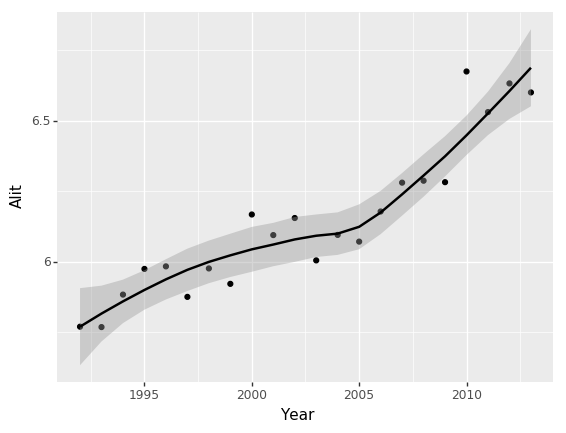

<ggplot: (7558215979)>

In [10]:
gg1 = p9.ggplot(arealt_grouped)
gg1 += p9.aes(x = 'Year', y = 'Alit' )
gg1 += p9.geom_point()
gg1 += p9.geom_smooth(method = 'loess')

gg1

In [11]:
nl = data.copy()[['Code', 'Region','Year','Alit']]
nl_2013 = nl.loc[nl['Year'] == 2013]
nl_2013 = nl_2013.drop(columns = 'Year')

In [12]:
type(nl)
print(nl_2013.shape)
nl_2013.head()

(246, 3)


,Code,Region,Alit
0,ABW,Aruba,4.794165
1,AFG,Afghanistan,6.837424
2,AGO,Angola,7.733642
3,AIA,Anguilla,3.220334
4,ALA,Aland Islands,3.614013


In [26]:
colors = 9
value = 'Alit'
cmap = 'Blues'
figsize = (16, 10)
title = 'World Area Lit in 2013'

In [27]:
shapefile = 'ne_10m_admin_0_countries.shp'

In [28]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')

In [29]:
nl_merged = gdf.merge(nl_2013, left_on='ADM0_A3', right_on='Code')

In [17]:
nl_merged.shape[0]

232

In [49]:
nl_2013.shape[0]

246

In [50]:
gdf.shape[0]

255

In [95]:
nl_merged.describe()

,Alit
count,208.000000
mean,6.653972
std,2.515803
min,-0.989244
25%,4.844466
50%,6.672405
75%,8.431627
max,13.004098


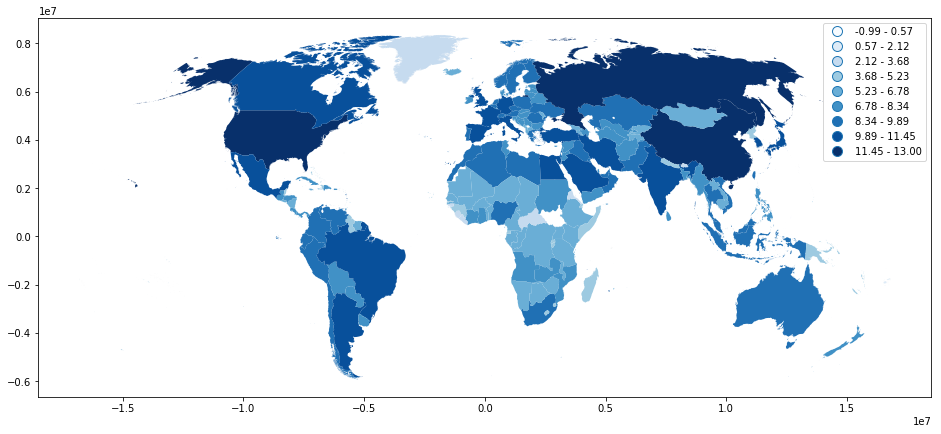

In [30]:
ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

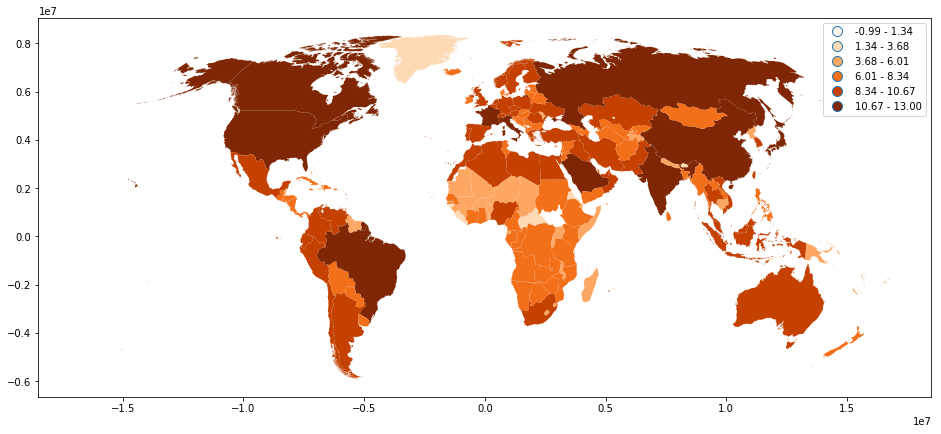

In [34]:
colors = 6
value = 'Alit'
cmap = 'Oranges'
figsize = (16, 10)
title = 'World Area Lit in 2013'
ax = nl_merged.dropna().plot(column = value , cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)

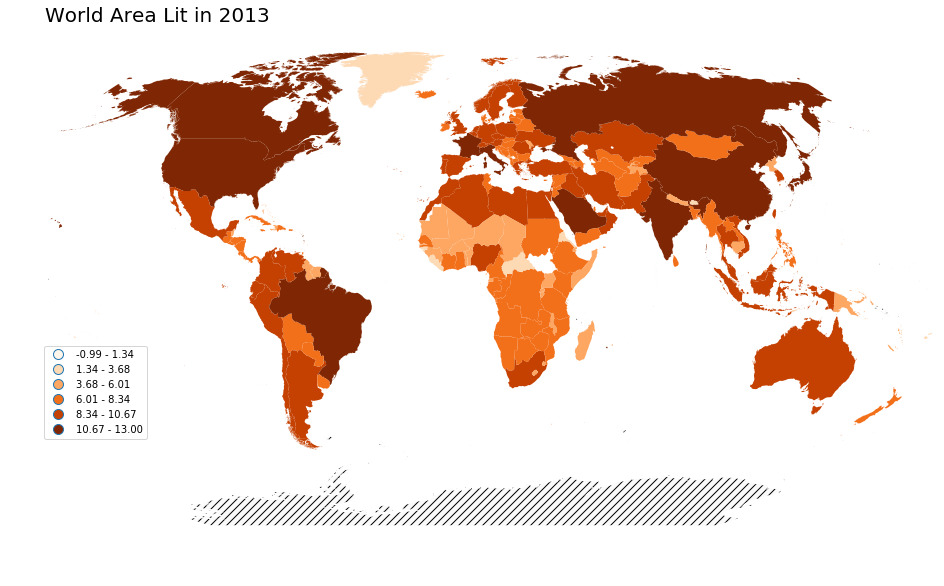

<Figure size 432x288 with 0 Axes>

In [36]:
nl_merged[nl_merged.isna().any(axis=1)].plot(ax=ax, color='#fafafa', hatch='///')

ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
# ax.annotate(description, xy=(0.1, 0.1), size=12, xycoords='figure fraction')

ax.set_axis_off()
ax.set_xlim([-1.5e7, 1.7e7])
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.get_figure()

In [38]:
from IPython.html.widgets import *